<a href="https://www.kaggle.com/code/hilalalpak/flo-rfm-analizi-cltv-tahmini?scriptVersionId=181253769" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color: #ffffff; border-radius: 8px; background-color:#FF5733  ; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Alternate Gothic No. 2; font-weight: bold; letter-spacing: 2px;"> RFM ANALİZİ & CLTV TAHMİN</p> 
</div>
<div style="background-image: url('https://www.flo.com.tr/pub/assets/flo-v2/images/flo-4-logo.png'); background-size: contain; background-repeat: no-repeat; background-position: center; width: 1100px; height: 40px; border-radius: 8px; margin: 0 auto; background-color: #ffffff; overflow: hidden; background-clip: padding-box;">
</div>


<div style="display: flex; justify-content: center; margin-bottom: 20px;">
    <div style="border: 2px solid #333333; border-radius: 5px; padding: 8px; background-color:#232f3e; max-width: 800px; text-align: center; margin: auto;">
        <p style="font-weight:bold; color:white; margin:20; font-size: 100%;font-family: Arial, sans-serif;">VERİ SETİ HİKAYESİ</p>
        <p style="color:#ffffff; font-size: 90%; font-family: Arial, sans-serif; margin-top:5px;">Flo Mağazacılık, 2020 ile 2021 yılları arasında alışveriş yapan müşterilerin davranışlarından elde edilen verileri kapsar.</p>
    </div>
</div>



<div style="background-color:#232f3e; padding:20px; width: fit-content; max-width: 700px; margin: auto; text-align: center; border-radius: 10px;">
    <span style="font-weight:bold; color:#FF5733;">master_id:</span> <span style="color:white">Eşsiz müşteri numarası</span> <br>
    <span style="font-weight:bold; color:#FF5733;">last_order_channel:</span> <span style="color:white">En son alışverişin yapıldığı kanal</span> <br>
    <span style="font-weight:bold; color:#FF5733;">first_order_date:</span> <span style="color:white">Müşterinin yaptığı ilk alışveriş tarihi</span> <br>
    <span style="font-weight:bold; color:#FF5733;">last_order_date:</span> <span style="color:white"> Müşterinin yaptığı son alışveriş tarihi</span> <br>
    <span style="font-weight:bold; color:#FF5733;">last_order_date_online:</span> <span style="color:white">Müşterinin online platformda yaptığı son alışveriş tarihi</span> <br>
    <span style="font-weight:bold; color:#FF5733">last_order_date_offline:</span> <span style="color:white">Müşterinin offline platformda yaptığı son alışveriş tarihi</span> <br>
    <span style="font-weight:bold; color:#FF5733;">order_num_total_ever_online:</span> <span style="color:white">Müşterinin online platformda yaptığı toplam alışveriş sayısı</span> <br>
    <span style="font-weight:bold; color:#FF5733;">order_num_total_ever_offline:</span> <span style="color:white">Müşterinin offline'da yaptığı toplam alışveriş sayısı</span> <br>
    <span style="font-weight:bold; color:#FF5733;">customer_value_total_ever_online:</span> <span style="color:white">Müşterinin offline alışverişlerinde ödediği toplam ücret</span> <br>
    <span style="font-weight:bold; color:#FF5733;">customer_value_total_ever_online:</span> <span style="color:white">Müşterinin online alışverişlerinde ödediği toplam ücret</span> <br>
    <span style="font-weight:bold; color:#FF5733;">customer_value_total_ever_offline:</span> <span style="color:white">Müşterinin online alışverişlerinde ödediği toplam ücret</span> <br>
    <span style="font-weight:bold; color:#FF5733;">interested_in_categories_12:</span> <span style="color:white">Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi</span> <br>
    <span style="font-weight:bold; color:#FF5733;">order_channel:</span> <span style="color:white">Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)</span> <br>
</div>

<div style="display: flex; justify-content: center; margin-bottom: 50px;">
    <div style="border: 2px solid #333333; border-radius: 5px; padding: 8px; background-color:#232f3e; max-width: 600px; text-align: center; margin: auto;">
        <p style="color:#ffffff; font-size: 90%; font-family: Arial, sans-serif; margin-top:5px;">Veri seti Omnichannel yani hem offline hemde online alışveriş davranışlarını içermektedir.</p>
    </div>
</div>



In [1]:
## Kütüphaneler
!pip install lifetimes
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

# Ayarlar
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.3 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR]


In [3]:
## Veri Setine Genel Bakış

df.describe().T
df.info()

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0000,3.1109,4.2256,1.0000,1.0000,2.0000,4.0000,200.0000
order_num_total_ever_offline,19945.0000,1.9139,2.0629,1.0000,1.0000,1.0000,2.0000,109.0000
customer_value_total_ever_offline,19945.0000,253.9226,301.5329,10.0000,99.9900,179.9800,319.9700,18119.1400
customer_value_total_ever_online,19945.0000,497.3217,832.6019,12.9900,149.9800,286.4600,578.4400,45220.1300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [4]:
# Zaman belirten değişkenlerin object tipini date'e dönüştüreceğiz.
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))

import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_18/3722363411.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))
/tmp/ipykernel_18/3722363411.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))
/tmp/ipykernel_18/3722363411.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, dayfirst=True))
/tmp/ipykernel_18/3722363411.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[dat

In [5]:
df["master_id"].nunique() # Toplam eşsiz müşteri sayısı

19945

In [6]:
df.isnull().sum() # Veri setinde eksik değer sorgulama

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [7]:
## Her bir müşterinin verdiği toplam sipariş ve yaptığı toplam ödeme

df["TotalOrder"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["TotalPrice"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

<Axes: xlabel='order_channel', ylabel='count'>

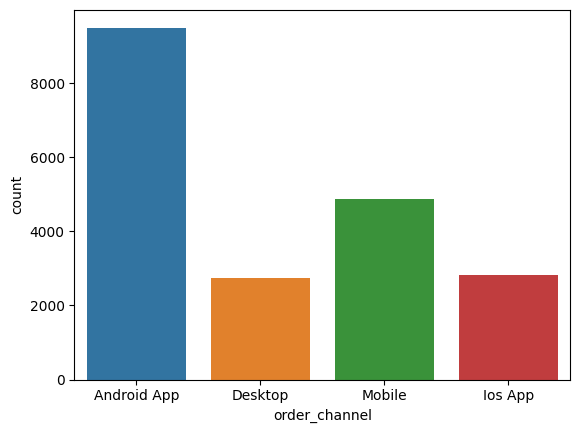

TotalOrder              TotalPrice         
                   count        sum          sum     mean
order_channel                                            
Android App         9495 52269.0000 7819062.7600 823.4927
Desktop             2735 10920.0000 1610321.4600 588.7830
Ios App             2833 15351.0000 2525999.9300 891.6343
Mobile              4882 21679.0000 3028183.1600 620.2751

In [8]:
## Toplam alınan ürün sayısının ve harcamaların alışveriş kanallarındaki müşteri sayısına göre dağılımına bakalım.

import seaborn as sns

sns.countplot(x=df["order_channel"], data=df)
plt.show()

df.groupby("order_channel").agg({"TotalOrder": ["count", "sum"],
                                 "TotalPrice": ["sum", "mean"]})

# RFM ANALİZİ

RFM analizi, işletmelerin müşteri odaklı stratejiler geliştirmesine ve müşteri memnuniyetini artırmasına yardımcı olur. 
İlk olarak RFM metriklerini elde etmemiz gerekiyor.

* Recency: Müşterinin son sipariş tarihinin üzerinden geçen zaman.
* Frequency: Müşterinin toplam sipariş sayısı.
* Monetary: Müşterinin şirkete ödediği toplam ücret.



In [9]:
## Tutarlı sonuçlar almak adına analiz tarihini son satın alma tarihinden 2 gün sonrası olacak şekilde değiştireceğiz.

df["last_order_date"].max() # 2021-05-30
today_date = dt.datetime(2021, 6, 1)

Timestamp('2021-05-30 00:00:00')

In [10]:
rfm = df.groupby("master_id").agg({"last_order_date" : lambda x: (today_date - x.max()).days,
                                   "TotalOrder" : lambda x: x,
                                   "TotalPrice" : lambda x: x})
rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300


In [11]:
#Değerleri karşılaştırabilmek adına qcut methodu ile RFM skorları oluşturacağız

rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])

rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

#Analizde recency ve frequency değerlerini kullanacağız. Bu yüzden bu iki değeri birleştirdik.

In [12]:
## RF Segmentasyonunu oluşturacağız

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'}

rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg({"mean", "count"})

recency          frequency         monetary          
                      count     mean     count    mean    count      mean
segment                                                                  
About_to_Sleep         1643 114.0316      1643  2.4066     1643  361.6494
At_Risk                3152 242.3290      3152  4.4702     3152  648.3250
Cant_Loose             1194 235.1591      1194 10.7169     1194 1481.6524
Champions              1920  17.1422      1920  8.9651     1920 1410.7089
Hibernating            3589 247.4263      3589  2.3915     3589  362.5833
Loyal_Customers        3375  82.5579      3375  8.3564     3375 1216.2572
Need_Attention          806 113.0372       806  3.7395      806  553.4366
New_Customers           673  17.9762       673  2.0000      673  344.0495
Potential_Loyalists    2925  36.8697      2925  3.3108     2925  533.7413
Promising               668  58.6946       668  2.0000      668  334.1533

In [13]:
# rfm isimli dataframe'e df'teki kategoriler değişkenini, master_id ortaklığında ekliyoruz. 

cat_df = df[["master_id", "interested_in_categories_12"]]

rfm = pd.merge(rfm, cat_df, on="master_id")
rfm.head()

,master_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700,5,4,4,54,Champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700,1,1,2,12,Hibernating,"[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900,2,4,3,23,At_Risk,"[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600,5,4,4,54,Champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300,5,5,4,54,Champions,"[ERKEK, AKTIFSPOR]"


In [14]:
rfm["frequency"] = rfm["frequency"].astype(int)

> # Case1; 

> FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçmek isteniliyor. Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

In [15]:
df_cust = rfm[["master_id", "segment", "interested_in_categories_12"]]
df_cust = df_cust.loc[(df_cust["interested_in_categories_12"].str.contains("KADIN")) &
                      ((df_cust["segment"] == "Loyal_Customers") | (df_cust["segment"] == "Champions"))]
df_cust.head()
#df_cust.to_csv("customers.csv")

,master_id,segment,interested_in_categories_12
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,Champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
18,003903e0-abce-11e9-a2fc-000d3a38a36f,Loyal_Customers,[KADIN]
22,004bec18-9f7a-11e9-a2fc-000d3a38a36f,Loyal_Customers,"[ERKEK, KADIN, AKTIFSPOR]"
25,00534fe4-a6b4-11e9-a2fc-000d3a38a36f,Loyal_Customers,"[ERKEK, KADIN, AKTIFSPOR]"
49,009293fe-1f3e-11ea-87bf-000d3a38a36f,Loyal_Customers,"[COCUK, KADIN, AKTIFSPOR]"


> # Case2;

> Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [16]:
target_cust = rfm[["master_id", "segment", "interested_in_categories_12"]]
target_cust= target_cust.loc[(target_cust["interested_in_categories_12"].str.contains("ERKEK")) |
                  (target_cust["interested_in_categories_12"].str.contains("COCUK")) & 
                ((target_cust["segment"] == "Cant_Loose") | (target_cust["segment"] == "Hibernating") | (target_cust["segment"] == "New_Customers"))]

target_cust.head()
#target.to_csv("targets.csv")

,master_id,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,Champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,Hibernating,"[ERKEK, KADIN]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,Champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,Champions,"[ERKEK, AKTIFSPOR]"
11,00263f1a-210a-11ea-b50a-000d3a38a36f,Hibernating,[ERKEK]



# BG-NBD / Gamma-Gamma CLTV TAHMİNİ


* CLTV = (Customer Value / Churn Rate) * Profit Margin

* Ortalama Sipariş Değeri = Toplam Tutar / Toplam İşlem Sayısı
* Satın Alma Frekansı = Toplam İşlem Sayısı / Toplam Müşteri Sayısı
* Customer Value = Müş. Ort. Sipariş Değeri * Satınalma Frekansı
* Churn Rate = 1 - Tekrar Etme Oranı
* Tekrar Etme Oranı = En az 2 sipariş veren müşteri sayısı / Toplam Müşteri Sayısı
* Profit Margin = Toplam Tutar * Kar Oranı


> CustomerValue = Purchase Frequency * Average Order Value

> CLTV = (Customer Value / Churn Rate) * Profit Margin

> CLTV = Expected Number of Transaction * Expected Average Profit

> CLTV Prediction = BGNBD Model * Gamma Gamma Model

In [17]:
df = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR]


In [18]:
# Aykırı değerleri bulmak için

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değerleri traşlamak için

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = round(low_limit, 0)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = round(up_limit, 0)      

In [19]:
columns = ["order_num_total_ever_online", "order_num_total_ever_offline", 
           "customer_value_total_ever_offline","customer_value_total_ever_online"] 

for col in columns: 
    replace_with_thresholds(df, col)

In [20]:
df["TotalOrder"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["TotalPrice"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [21]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x))

df["last_order_date"].max() #2021-05-30
today_date = dt.datetime(year=2021, month=6, day=1)

Timestamp('2021-05-30 00:00:00')

> CLTV için;

* recency: last_order_date - first_order_date
* frequency: Tekrar eden toplam satın alma
* monetary: İşlem başına ortalama kazanç
* T (Müşteri yaşı): today_date - first_order_date

In [22]:
cltv_df = pd.DataFrame()
cltv_df["customer_id"] = df["master_id"]
cltv_df["recency_cltv_weekly"] = (df["last_order_date"] - df["first_order_date"]).dt.days / 7
cltv_df["T_weekly"] = (today_date - df["first_order_date"]).dt.days / 7
cltv_df["frequency"] = df["TotalOrder"]
cltv_df["monetary_cltv_avg"] = df["TotalPrice"] / df["TotalOrder"]

cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.0000,30.5714,5.0000,187.8740
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.8571,224.8571,21.0000,95.8833
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.2857,78.8571,5.0000,117.0640
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.5714,20.8571,2.0000,60.9850
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.1429,95.4286,2.0000,104.9900


In [23]:
## BG-NBD modeli

bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 76.17, b: 0.00, r: 3.66>

In [24]:
cltv_df["exp_sales_3_month"] = bgf.predict(4 * 3,
                                           cltv_df['frequency'],
                                           cltv_df['recency_cltv_weekly'],
                                           cltv_df['T_weekly'])

cltv_df["exp_sales_6_month"] = bgf.predict(4 * 6,
                                           cltv_df['frequency'],
                                           cltv_df['recency_cltv_weekly'],
                                           cltv_df['T_weekly'])
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.0000,30.5714,5.0000,187.8740,0.9739,1.9479
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.8571,224.8571,21.0000,95.8833,0.9832,1.9663
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.2857,78.8571,5.0000,117.0640,0.6706,1.3412
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.5714,20.8571,2.0000,60.9850,0.7004,1.4008
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.1429,95.4286,2.0000,104.9900,0.3960,0.7921


<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

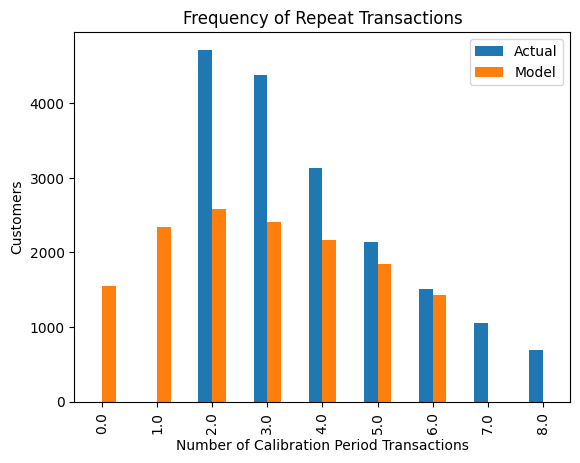

In [25]:
plot_period_transactions(bgf)
plt.show()

In [26]:
## Gamma-Gamma Modeli

#Müşteri için ortalama kazanç tahmini

ggf = GammaGammaFitter(penalizer_coef=0.01)                
ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])

cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary_cltv_avg'])

cltv_df.head()

<lifetimes.GammaGammaFitter: fitted with 19945 subjects, p: 4.15, q: 0.47, v: 4.08>

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_profit
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.0000,30.5714,5.0000,187.8740,0.9739,1.9479,193.6327
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.8571,224.8571,21.0000,95.8833,0.9832,1.9663,96.6650
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.2857,78.8571,5.0000,117.0640,0.6706,1.3412,120.9676
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.5714,20.8571,2.0000,60.9850,0.7004,1.4008,67.3201
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.1429,95.4286,2.0000,104.9900,0.3960,0.7921,114.3251


In [27]:
## 6 Ay için CLTV Tahmini

cltv_df["cltv"] = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['T_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=6, #month  
                                   freq="W",  
                                   discount_rate=0.01)
cltv_df.sort_values(by="cltv", ascending=False).head(10)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_profit,cltv
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.8571,7.8571,4.0000,1401.8000,1.0944,2.1888,1449.0605,3327.7770
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.1429,13.1429,11.0000,758.0855,1.9701,3.9402,767.3606,3172.3944
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.7143,101.0000,7.0000,1106.4671,0.7222,1.4445,1127.6115,1708.9821
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.2857,74.5714,16.0000,501.8737,1.5653,3.1306,506.1667,1662.6135
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.7143,67.2857,52.0000,166.2246,4.6561,9.3123,166.7123,1628.8874
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,3.4286,34.4286,8.0000,601.2262,1.2655,2.5309,611.4926,1623.8127
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,8.2857,9.4286,2.0000,862.6900,0.7939,1.5878,923.6800,1538.8559
6666,53fe00d4-7b7a-11eb-960b-000d3a38a36f,9.7143,13.0000,17.0000,259.8653,2.7807,5.5614,262.0729,1529.2280
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,52.5714,58.7143,31.0000,228.5300,3.0838,6.1676,229.6069,1485.8192
14858,031b2954-6d28-11eb-99c4-000d3a38a36f,14.8571,15.5714,3.0000,743.5867,0.8716,1.7431,778.0504,1422.9997


In [28]:
## SEGMENTASYON

cltv_df["segment"] = pd.qcut(cltv_df["cltv"], 4, labels=["D", "C", "B", "A"])

cltv_df.sort_values(by="cltv", ascending=False).head(10)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_profit,cltv,segment
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.8571,7.8571,4.0000,1401.8000,1.0944,2.1888,1449.0605,3327.7770,A
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.1429,13.1429,11.0000,758.0855,1.9701,3.9402,767.3606,3172.3944,A
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.7143,101.0000,7.0000,1106.4671,0.7222,1.4445,1127.6115,1708.9821,A
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.2857,74.5714,16.0000,501.8737,1.5653,3.1306,506.1667,1662.6135,A
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.7143,67.2857,52.0000,166.2246,4.6561,9.3123,166.7123,1628.8874,A
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,3.4286,34.4286,8.0000,601.2262,1.2655,2.5309,611.4926,1623.8127,A
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,8.2857,9.4286,2.0000,862.6900,0.7939,1.5878,923.6800,1538.8559,A
6666,53fe00d4-7b7a-11eb-960b-000d3a38a36f,9.7143,13.0000,17.0000,259.8653,2.7807,5.5614,262.0729,1529.2280,A
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,52.5714,58.7143,31.0000,228.5300,3.0838,6.1676,229.6069,1485.8192,A
14858,031b2954-6d28-11eb-99c4-000d3a38a36f,14.8571,15.5714,3.0000,743.5867,0.8716,1.7431,778.0504,1422.9997,A


In [29]:
cltv_df.groupby("segment").agg({"count", "sum"})

customer_id                                                    recency_cltv_weekly             T_weekly             frequency            monetary_cltv_avg              exp_sales_3_month           exp_sales_6_month           expected_average_profit               cltv             
              count                                                sum               count         sum    count         sum     count        sum             count          sum             count       sum             count       sum                   count          sum count          sum
segment                                                                                                                                                                                                                                                                                        
D              4987  1854e56c-491f-11eb-806e-000d3a38a36fd6ea1074-f...                4987 693193.8571     4987 808807.7143      4987 18795.0000              4987  464547.0459              4987 2039.1639              4987 4078.3277                    4987  492172.4415  4987  400657.9551
C              4986  c445e4ee-6242-11ea-9d1a-000d3a38a36fec6c382a-3...                4986 461850.8571     4986 562512.1429      4986 21962.0000              4986  627181.6473              4986 2619.8846              4986 5239.7692                    4986  659401.4525  4986  689621.1777
B              4986  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f69b69676-1...                4986 408794.0000     4986 500228.0000      4986 25392.0000              4986  800933.9587              4986 2997.1097              4986 5994.2195                    4986  837650.8816  4986  994870.7838
A              4986  cc294636-19f0-11eb-8d74-000d3a38a36fcfbda69e-5...                4986 336191.7143     4986 411592.8571      4986 33140.0000              4986 1140952.0746              4986 3854.3130              4986 7708.6260                    4986 1186787.6390  4986 1806505.0889